# Global Mean Response: scatter
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [56]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth
import geoxarray

Fri Jun 22 10:13:31 EDT 2018


In [95]:
# parameters
data_names = ['netrad_toa', 't_surf', 'swdn_sfc_clr', 'swdn_toa_clr', 'swup_toa_clr']
figname = f'fig_globalMean.scatter.pdf'
prcp_scale = 3600 * 24

nino_ens = [ 7,  9, 12, 15, 17, 20, 22, 24, 27, 30]
nina_ens = [ 2,  6,  8, 13, 14, 18, 21, 25, 28, 29]
neut_ens = [1, 3, 4, 5, 10, 11, 16, 19, 23, 26]

### Agung data

In [60]:
# Agung data
tsas_agung = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    tsas_agung[data_name] = dict()
    tsas_agung[data_name]['Global'] = daa.geo.fldmean()
    tsas_agung[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
    tsas_agung[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swdn_sfc_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swdn_sfc_clr.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swdn_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swdn_toa_clr.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swup_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swup_toa_clr.nc


### StMaria data

In [61]:
# St Maria data
tsas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    tsas_stmaria[data_name] = dict()
    tsas_stmaria[data_name]['Global'] = daa.geo.fldmean()
    tsas_stmaria[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
    tsas_stmaria[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swdn_sfc_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swdn_sfc_clr.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swdn_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swdn_toa_clr.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swup_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swup_toa_clr.nc


### Pinatubo data

In [62]:
# Pinatubo data
tsas_pinatubo = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_pinatubo import open_data as get_volcano
    volcano_name = 'Pinatubo'
    year_volcano = 1991
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_pinatubo.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    tsas_pinatubo[data_name] = dict()
    tsas_pinatubo[data_name]['Global'] = daa.geo.fldmean()
    tsas_pinatubo[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
    tsas_pinatubo[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swdn_sfc_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swdn_sfc_clr.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swdn_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swdn_toa_clr.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swup_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swup_toa_clr.nc


### `netrad_toa` vs. `t_surf`

<IPython.core.display.Javascript object>


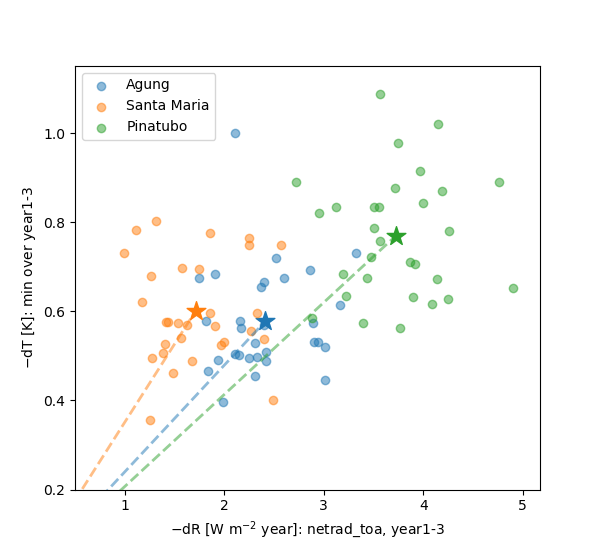

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.23956246200929826)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.3510360775750691)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.2066856682383026)


(0.2, 1.151319673001687)

In [72]:
# scatter plot
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
dT = tsas_agung['t_surf']['Global'].min(dim='time')
# print(dT)
dR = tsas_agung['netrad_toa']['Global'].sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())

volname = 'Santa Maria'
dT = tsas_stmaria['t_surf']['Global'].min(dim='time')
# print(dT)
dR = tsas_stmaria['netrad_toa']['Global'].sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())

volname = 'Pinatubo'
dT = tsas_pinatubo['t_surf']['Global'].min(dim='time')
# print(dT)
dR = tsas_pinatubo['netrad_toa']['Global'].sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netrad_toa, year1-3')
plt.ylabel('$-$dT [K]: min over year1-3')
plt.xlim(.5,None)
plt.ylim(.2, None)

<IPython.core.display.Javascript object>


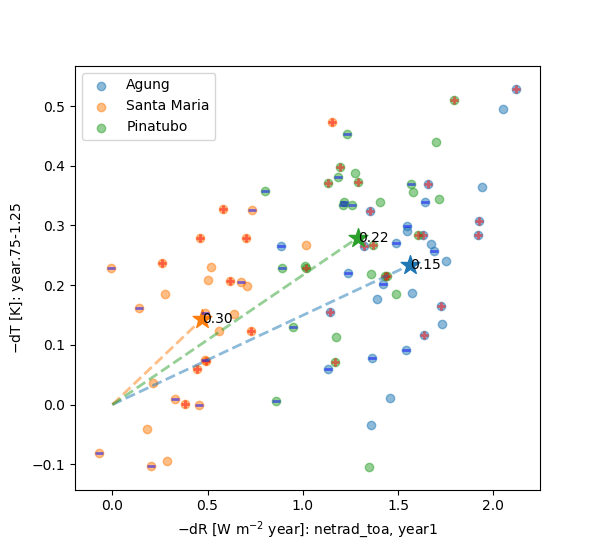

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.1495872883158881)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.30398258551818125)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.21690983302769493)


Text(0,0.5,'$-$dT [K]: year.75-1.25')

In [115]:
# scatter plot: forcing netrad_toa over year 1, response over year 0.75-1.25(Oct-Mar+)
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year}-10', f'{year+1}-03')).mean(dim='time')
# print(dT)
dR = tsas_agung['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year}-10', f'{year+1}-03')).mean(dim='time')
# print(dT)
dR = tsas_stmaria['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year}-10', f'{year+1}-03')).mean(dim='time')
# print(dT)
dR = tsas_pinatubo['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netrad_toa, year1')
plt.ylabel('$-$dT [K]: year.75-1.25')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

<IPython.core.display.Javascript object>


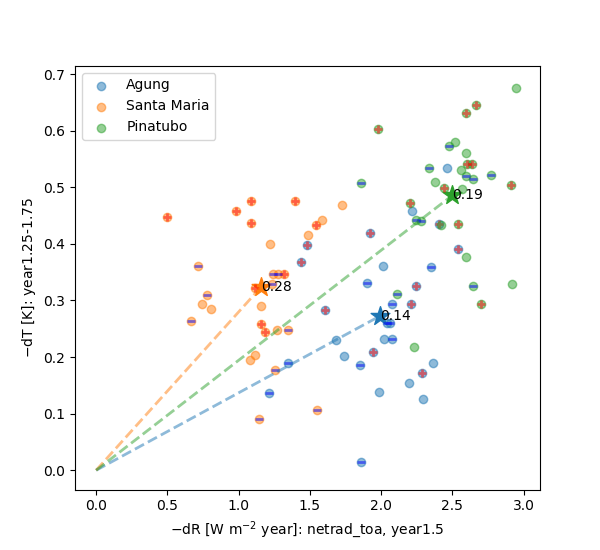

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.13676528037753663)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.2796027105264593)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.19423706616329617)


Text(0,0.5,'$-$dT [K]: year1.25-1.75')

In [113]:
# scatter plot: forcing netrad_toa over year 1.5, response over year 1.25-1.75
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year+1}-04', f'{year+1}-09')).mean(dim='time')
# print(dT)
dR = tsas_agung['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+1}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year+1}-04', f'{year+1}-09')).mean(dim='time')
# print(dT)
dR = tsas_stmaria['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+1}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)
    
volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year+1}-04', f'{year+1}-09')).mean(dim='time')
# print(dT)
dR = tsas_pinatubo['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+1}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netrad_toa, year1.5')
plt.ylabel('$-$dT [K]: year1.25-1.75')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

<IPython.core.display.Javascript object>


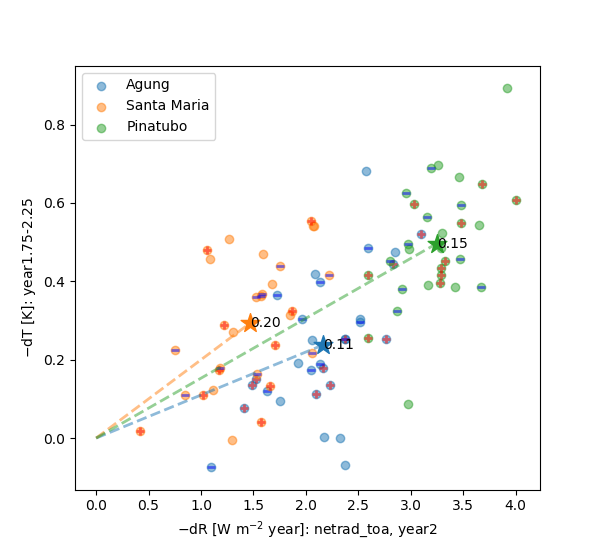

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.10977189564431415)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.19973822861063434)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.15277540546308765)


Text(0,0.5,'$-$dT [K]: year1.75-2.25')

In [114]:
# scatter plot: forcing netrad_toa over year 2, response over year 1.75-2.25(Oct-Mar+)
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year+1}-10', f'{year+2}-03')).mean(dim='time')
# print(dT)
dR = tsas_agung['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+1}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year+1}-10', f'{year+2}-03')).mean(dim='time')
# print(dT)
dR = tsas_stmaria['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+1}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year+1}-10', f'{year+2}-03')).mean(dim='time')
# print(dT)
dR = tsas_pinatubo['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+1}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netrad_toa, year2')
plt.ylabel('$-$dT [K]: year1.75-2.25')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

<IPython.core.display.Javascript object>


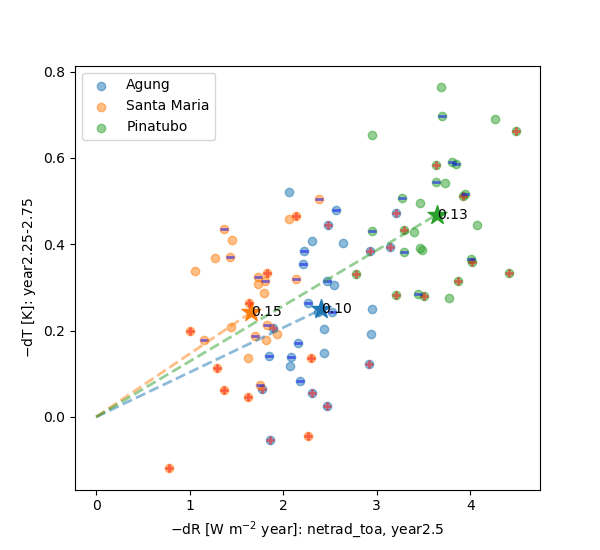

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.10342454609772721)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.14618158457872618)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.12865625558627317)


Text(0,0.5,'$-$dT [K]: year2.25-2.75')

In [111]:
# scatter plot: forcing netrad_toa over year 2.5, response over year 2.25-2.75
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year+2}-04', f'{year+2}-09')).mean(dim='time')
# print(dT)
dR = tsas_agung['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+2}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year+2}-04', f'{year+2}-09')).mean(dim='time')
# print(dT)
dR = tsas_stmaria['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+2}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)


volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year+2}-04', f'{year+2}-09')).mean(dim='time')
# print(dT)
dR = tsas_pinatubo['netrad_toa']['Global'].sel(time=slice(f'{year}-01', f'{year+2}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netrad_toa, year2.5')
plt.ylabel('$-$dT [K]: year2.25-2.75')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

## netsw_toa vs `t_surf`

<IPython.core.display.Javascript object>


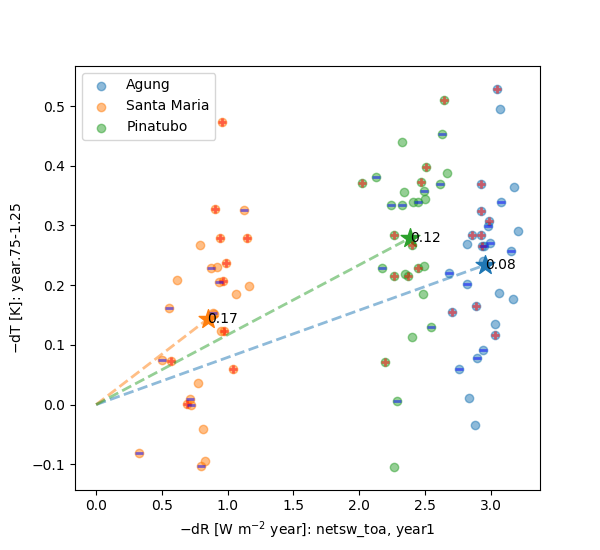

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.07903049553941341)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.1689520399967375)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.11690889631053722)


Text(0,0.5,'$-$dT [K]: year.75-1.25')

In [116]:
# scatter plot: forcing netsw_toa over year 1, response over year 0.75-1.25(Oct-Mar+)
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year}-10', f'{year+1}-03')).mean(dim='time')
# print(dT)
dR = (tsas_agung['swdn_toa_clr']['Global'] - tsas_agung['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year}-10', f'{year+1}-03')).mean(dim='time')
# print(dT)
dR = (tsas_stmaria['swdn_toa_clr']['Global'] - tsas_stmaria['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year}-10', f'{year+1}-03')).mean(dim='time')
# print(dT)
dR = (tsas_pinatubo['swdn_toa_clr']['Global'] -  tsas_pinatubo['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netsw_toa, year1')
plt.ylabel('$-$dT [K]: year.75-1.25')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

<IPython.core.display.Javascript object>


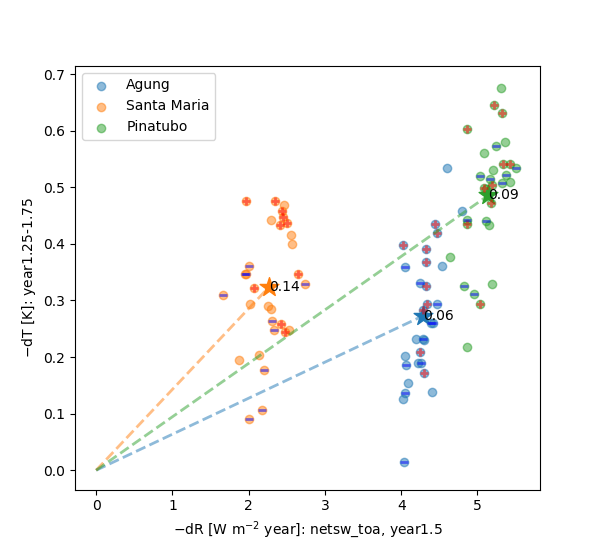

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.06364960562510251)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.1428055196324719)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.09443875892185749)


Text(0,0.5,'$-$dT [K]: year1.25-1.75')

In [117]:
# scatter plot: forcing netsw_toa over year 1.5, response over year 1.25-1.75
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year+1}-04', f'{year+1}-09')).mean(dim='time')
# print(dT)
dR = (tsas_agung['swdn_toa_clr']['Global'] - tsas_agung['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+1}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year+1}-04', f'{year+1}-09')).mean(dim='time')
# print(dT)
dR = (tsas_stmaria['swdn_toa_clr']['Global'] - tsas_stmaria['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+1}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year+1}-04', f'{year+1}-09')).mean(dim='time')
# print(dT)
dR = (tsas_pinatubo['swdn_toa_clr']['Global'] -  tsas_pinatubo['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+1}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netsw_toa, year1.5')
plt.ylabel('$-$dT [K]: year1.25-1.75')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

<IPython.core.display.Javascript object>


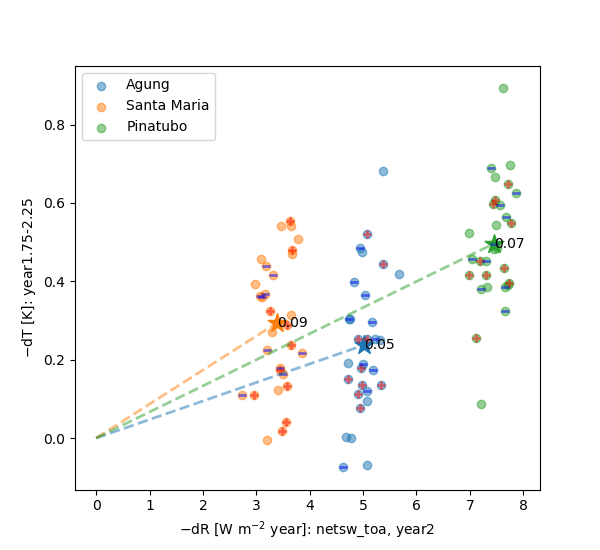

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.047283965356425074)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.08677229499084081)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.06658279360027225)


Text(0,0.5,'$-$dT [K]: year1.75-2.25')

In [118]:
# scatter plot: forcing netsw_toa over year 2, response over year 1.75-2.25(Oct-Mar+)
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year+1}-10', f'{year+2}-03')).mean(dim='time')
# print(dT)
dR = (tsas_agung['swdn_toa_clr']['Global'] - tsas_agung['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+1}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year+1}-10', f'{year+2}-03')).mean(dim='time')
# print(dT)
dR = (tsas_stmaria['swdn_toa_clr']['Global'] - tsas_stmaria['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+1}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year+1}-10', f'{year+2}-03')).mean(dim='time')
# print(dT)
dR = (tsas_pinatubo['swdn_toa_clr']['Global'] -  tsas_pinatubo['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+1}-12')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netsw_toa, year2')
plt.ylabel('$-$dT [K]: year1.75-2.25')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

<IPython.core.display.Javascript object>


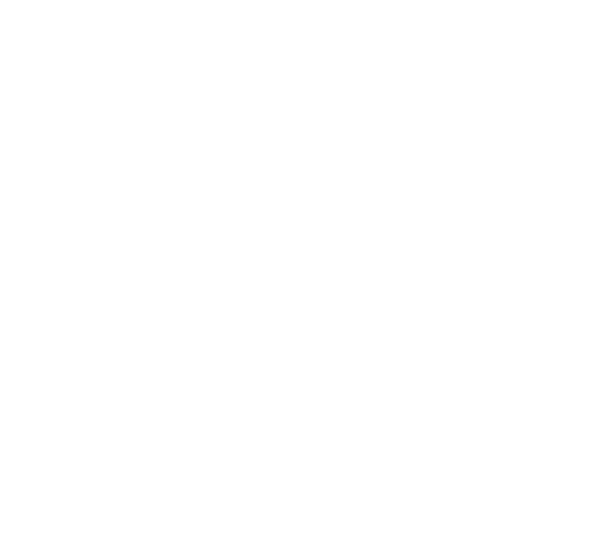

[dT]/[dR] of Agung: <xarray.DataArray ()>
array(0.04256819849529706)
[dT]/[dR] of Santa Maria: <xarray.DataArray ()>
array(0.05751683198430556)
[dT]/[dR] of Pinatubo: <xarray.DataArray ()>
array(0.05157459706895928)


FileNotFoundError: [Errno 2] No such file or directory: '~/tigress/public_html/pub/volcano/fig.pdf'

In [119]:
# scatter plot: forcing netsw_toa over year 2.5, response over year 2.25-2.75
fig, axes = plt.subplots(1,1, figsize=(6,5.5))
alpha = .5

volname = 'Agung'
year = 1963
dT = tsas_agung['t_surf']['Global'].sel(time=slice(f'{year+2}-04', f'{year+2}-09')).mean(dim='time')
# print(dT)
dR = (tsas_agung['swdn_toa_clr']['Global'] - tsas_agung['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+2}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C0', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C0', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C0', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Agung:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Santa Maria'
year = 1902
dT = tsas_stmaria['t_surf']['Global'].sel(time=slice(f'{year+2}-04', f'{year+2}-09')).mean(dim='time')
# print(dT)
dR = (tsas_stmaria['swdn_toa_clr']['Global'] - tsas_stmaria['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+2}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C1', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C1', marker='*', s=200)
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C1', alpha=alpha, ls='--')
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
print('[dT]/[dR] of Santa Maria:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

volname = 'Pinatubo'
year = 1991
dT = tsas_pinatubo['t_surf']['Global'].sel(time=slice(f'{year+2}-04', f'{year+2}-09')).mean(dim='time')
# print(dT)
dR = (tsas_pinatubo['swdn_toa_clr']['Global'] -  tsas_pinatubo['swup_toa_clr']['Global']) \
    .sel(time=slice(f'{year}-01', f'{year+2}-06')).sum(dim='time')/12.0
# print(dR)

plt.scatter(-dR, -dT, c='C2', label=volname, alpha=alpha)
plt.scatter(-dR.mean(), -dT.mean(), c='C2', marker='*', s=200)
plt.text(-dR.mean(), -dT.mean(), f'{(dT.mean()/dR.mean()).item():.2f}', ha='left', va='center')
plt.plot([0, -dR.mean()], [0, -dT.mean()], color='C2', alpha=alpha, ls='--')
print('[dT]/[dR] of Pinatubo:', dT.mean()/dR.mean())
for en in nino_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='r', marker='+', alpha=alpha)
for en in nina_ens:
    plt.scatter(-dR.sel(en=en), -dT.sel(en=en), c='b', marker='_', alpha=alpha)

plt.legend(frameon=True)
plt.xlabel('$-$dR [W m$^{-2}$ year]: netsw_toa, year2.5')
plt.ylabel('$-$dT [K]: year2.25-2.75')
# plt.xlim(.5,None)
# plt.ylim(.2, None)

plt.savefig('~/tigress/public_html/pub/volcano/fig.pdf')

### OLD---------------------------

<IPython.core.display.Javascript object>


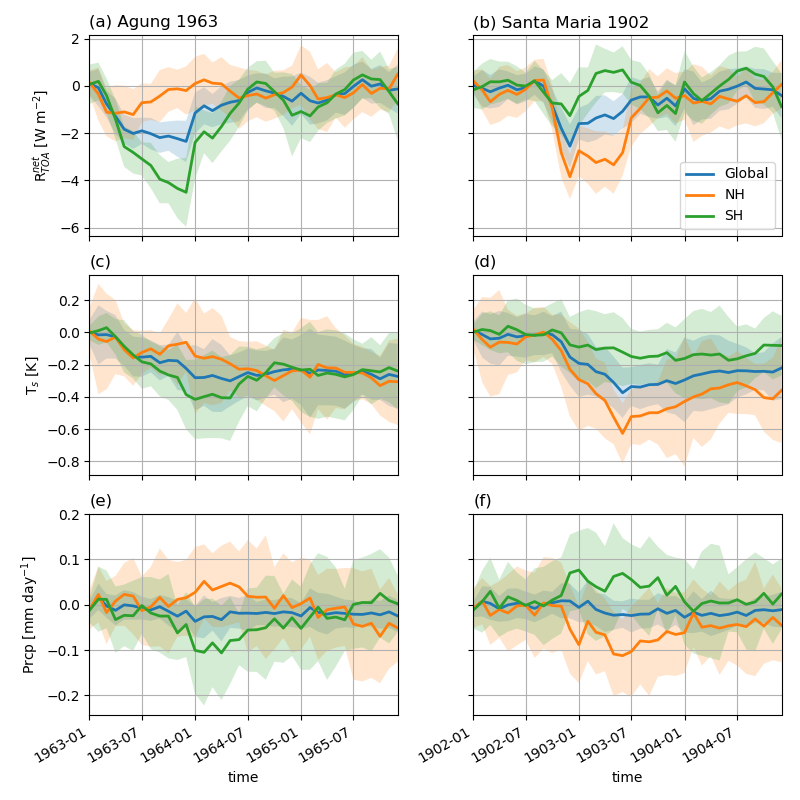

In [10]:
# plot
fill_alpha = 0.2

fig, axes = plt.subplots(3,2,figsize=(8,8), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
data_name = 'netrad_toa'

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.xlim(['1963-01', '1965-12'])
plt.title('(a) Agung 1963', loc='left')
plt.ylabel('R$^{net}_{TOA}$ [W m$^{-2}$]')
plt.grid(True)

# ##########
plt.sca(axes[0,1])
data_name = 'netrad_toa'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.legend(loc='lower right', frameon=True)
xticksmonth(range(1,13,6))
plt.xlim(['1902-01', '1904-12'])
plt.title('(b) Santa Maria 1902', loc='left')
plt.grid(True)

# ############
plt.sca(axes[1,0])
data_name = 't_surf'

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(c)', loc='left')
plt.ylabel('T$_s$ [K]')
plt.grid(True)

# ##########
plt.sca(axes[1,1])
data_name = 't_surf'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(d)', loc='left')
plt.grid(True)

# ############
plt.sca(axes[2,0])
data_name = 'precip'

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(e)', loc='left')
plt.ylabel('Prcp [mm day$^{-1}$]')
plt.grid(True)

# ##########
plt.sca(axes[2,1])
data_name = 'precip'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(f)', loc='left')
plt.grid(True)


plt.tight_layout()
plt.savefig(figname)